<figure>
  <IMG SRC="Logo.png"  WIDTH=150 ALIGN="right">
</figure>

## Projections of mean sea level and tides<br>
### Six Dutch stations
<b>Prepared by: H.G. Voortman</b>


<figure>
    <IMG SRC="https://www.python.org/static/community_logos/python-powered-w-200x80.png"  WIDTH=100 ALIGN="right">
</figure>

#### Description
- Showing examples of effects in the North Sea

#### References
- Provided in report

#### Packages

In [17]:
# General packages
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 as sq
import numpy as np
import scipy.signal as signal
import datetime as dt

import hvec_tide.analysers as tide

In [3]:
import utide as ut

In [6]:
help(ut.solve)

Help on function solve in module utide._solve:

solve(t, u, v=None, lat=None, **opts)
    Calculate amplitude, phase, confidence intervals of tidal constituents.
    
    Parameters
    ----------
    t : array_like
        Time in days since `epoch`.
    u : array_like
        Sea-surface height, velocity component, etc.
    v : {None, array_like}, optional
        If `u` is a velocity component, `v` is the orthogonal component.
    lat : float, required
        Latitude in degrees.
    epoch : {string, `datetime.date`, `datetime.datetime`}, optional
        Valid strings are 'python' (default); 'matlab' if `t` is
        an array of Matlab datenums; or an arbitrary date in the
        form 'YYYY-MM-DD'.  The default corresponds to the Python
        standard library `datetime` proleptic Gregorian calendar,
        starting with 1 at 00:00 on January 1 of year 1; this is
        the 'datenum' used by Matplotlib.
    constit : {'auto', sequence}, optional
        List of strings with s

In [18]:
os.chdir(os.getenv('DATAPATH') + r'/downloadspecs')
os.listdir()

['aKNMI_data.xlsx',
 'aRWS_coast.xlsx',
 'aRWS_inland.xlsx',
 'aRWS_storm_jan22.xlsx',
 'aRWS_test.xlsx',
 'del.txt',
 'del2.txt',
 'har.txt',
 'har2.txt',
 'hel.txt',
 'hel2.txt',
 'hvec_tide.log',
 'hvh.txt',
 'hvh2.txt',
 'ijm.txt',
 'ijm2.txt',
 'KNMI_data.xlsx',
 'locations.json',
 'RWS_data.xlsx',
 'vli.txt',
 'vli2.txt']

In [67]:
file = 'hVh.txt'
f = open(file)

In [68]:
# Skip lines until date is found for the first time
skip_cnt = 1
while True:
    string = f.readline()
    skip_cnt = skip_cnt + 1
    if string.startswith('01-'):
        skip_cnt = skip_cnt - 1
        break
f.close() # Close file
    
# Now read data, knowing the lines to skip
df = pd.read_csv(file, skiprows = skip_cnt, delim_whitespace = True,
                parse_dates = [[0, 1]]
                )
    
#%% Add a few additional columns
df.columns = ['tijd', 'tide', 'waarde']


In [69]:
file = 'hvh2.txt'
f = open(file)
# Skip lines until date is found for the first time
skip_cnt = 1
while True:
    string = f.readline()
    skip_cnt = skip_cnt + 1
    if string.startswith('01-'):
        skip_cnt = skip_cnt - 1
        break
f.close() # Close file
    
# Now read data, knowing the lines to skip
df2 = (pd.read_csv(file, skiprows = skip_cnt, delim_whitespace = True,
                parse_dates = [[0, 1]])
                )
    
#%% Add a few additional columns
df2.columns = ['tijd', 'tide', 'waarde']


In [70]:
df = pd.concat([df2, df])

In [71]:
df['year'] =df['tijd'].dt.year

In [72]:
df['naam'] = 'Hoek van Holland'

In [73]:
df.dtypes

tijd      datetime64[ns]
tide               int64
waarde             int64
year               int64
naam              object
dtype: object

In [82]:
constit = tide.analyse_long_series(
    df, col_datetime = 'tijd', col_h = 'waarde',
    col_loc = 'naam', lat = 52, 
    nodal = False,
    trend = False,
    method = 'linear',
    #constit = {'M2', 'S2', 'N2', 'K1'}, #, 'N2', 'M4'}, #, 'MU2', 'L2', 'K2', 'MS4', 'O1'},
    create_time_series = False,
    include_phase = False)

100%|██████████| 54/54 [00:26<00:00,  2.05it/s]


In [83]:
for cl in constit.columns:
    print(cl)

z0
M2_ampl
M4_ampl
MS4_ampl
MSM_ampl
S2_ampl
K1_ampl
MK3_ampl
MF_ampl
MM_ampl
N2_ampl
NU2_ampl
P1_ampl
MN4_ampl
MK4_ampl
M6_ampl
K2_ampl
L2_ampl
LDA2_ampl
SO3_ampl
S4_ampl
Q1_ampl
3MK7_ampl
MU2_ampl
2MK5_ampl
M8_ampl
2MN6_ampl
2N2_ampl
O1_ampl
MKS2_ampl
TAU1_ampl
NO1_ampl
EPS2_ampl
2MK6_ampl
OQ2_ampl
SIG1_ampl
RHO1_ampl
SSA_ampl
2MS6_ampl
CHI1_ampl
BET1_ampl
SK3_ampl
ALP1_ampl
J1_ampl
SN4_ampl
UPS1_ampl
PHI1_ampl
THE1_ampl
OO1_ampl
2SM6_ampl
ETA2_ampl
SO1_ampl
MSF_ampl
M3_ampl
2Q1_ampl
MSN2_ampl
SK4_ampl
2SK5_ampl
MSK6_ampl
MO3_ampl
M2_A_ci
M4_A_ci
MS4_A_ci
MSM_A_ci
S2_A_ci
K1_A_ci
MK3_A_ci
MF_A_ci
MM_A_ci
N2_A_ci
NU2_A_ci
P1_A_ci
MN4_A_ci
MK4_A_ci
M6_A_ci
K2_A_ci
L2_A_ci
LDA2_A_ci
SO3_A_ci
S4_A_ci
Q1_A_ci
3MK7_A_ci
MU2_A_ci
2MK5_A_ci
M8_A_ci
2MN6_A_ci
2N2_A_ci
O1_A_ci
MKS2_A_ci
TAU1_A_ci
NO1_A_ci
EPS2_A_ci
2MK6_A_ci
OQ2_A_ci
SIG1_A_ci
RHO1_A_ci
SSA_A_ci
2MS6_A_ci
CHI1_A_ci
BET1_A_ci
SK3_A_ci
ALP1_A_ci
J1_A_ci
SN4_A_ci
UPS1_A_ci
PHI1_A_ci
THE1_A_ci
OO1_A_ci
2SM6_A_ci
ETA2_A_ci
SO1_A_ci

In [84]:
constit.reset_index(inplace = True)
constit['year'] = constit['tijd'].dt.year

C:\Users\Hessel Voortman\AppData\Local\Temp\ipykernel_928\2040790704.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  constit.reset_index(inplace = True)
C:\Users\Hessel Voortman\AppData\Local\Temp\ipykernel_928\2040790704.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  constit.reset_index(inplace = True)
C:\Users\Hessel Voortman\AppData\Local\Temp\ipykernel_928\2040790704.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.

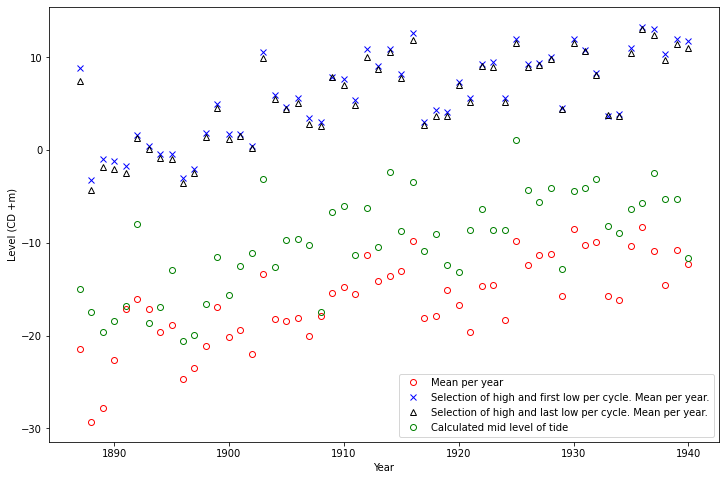

In [88]:
plt.figure(figsize = (12,8))
plt.plot(df['year'].unique(), df.groupby('year')['waarde'].mean(), 'ro', label = 'Mean per year', mfc = 'none')
data = df[df['tide'].isin([1,2,3])]
plt.plot(data['year'].unique(), data.groupby('year')['waarde'].mean(), 'bx', label = 'Selection of high and first low per cycle. Mean per year.')
data = df[df['tide'].isin([1,2,5])]
plt.plot(data['year'].unique(), data.groupby('year')['waarde'].mean(), 'k^', label = 'Selection of high and last low per cycle. Mean per year.', mfc = 'none')
plt.plot(constit['year'], constit['z0'], 'go', mfc = 'none', label = 'Calculated mid level of tide')
plt.xlabel('Year')
plt.ylabel('Level (CD +m)')
plt.legend();